In [11]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import numpy as np
import json
import mne
import matplotlib

In [12]:
dataset_ids = {
    1: '1ym3JqI4_ZYNSBLxoF1vNxI5Hsgur_tha',
    2: '1tJ5tHbE-2jwr0gA33Gd873lRPao-e4dF',
    3: '1tXdpY-mser01POaP6Qwixny6LjsXXoXB',
    4: '1T00cliWp5yqqbbWZ7-rf2X4tOUQ-PvIQ',
    5: '1CYsBFMul9zB_vCy0XD7XVfKUl8vihDYZ',
    6: '1io6jdALBKeopELWXahPzuAi6EfYDgviW',
    7: '1YDkheRDPNDR1ujsqqC_SY6cebWHkw9Xt',
    8: '1jjoQJFDCi7O9Q-iaReAPpQnxC-HIKpQi',
}
label_id = '1mD5MXoh6tfQJFXIvdw2MQsEu6vZka6C0'
desc = '14kYNBZYdttqmSS_Vz6Bm_ztG9Uw1MC0y'

# ALTERE O ID DO DATASET DE SUA ESCOLHA AQUI ##################################
DS = 4

In [13]:
# download do stataset
gdd.download_file_from_google_drive(file_id=dataset_ids[DS],
                                    dest_path='files/data.npy',
                                    showsize=True)
# download do arquivo de marcações
gdd.download_file_from_google_drive(file_id=label_id,
                                    dest_path='files/labels.npy', showsize=True)

# download do arquivo de descrição
gdd.download_file_from_google_drive(file_id=desc,
                                    dest_path='files/descriptor.json',
                                    showsize=True)

In [14]:
# carregamento
X = np.load('files/data.npy')
y = np.load('files/labels.npy')
desc_file = open('files/descriptor.json')
descriptor = json.loads(desc_file.read())
desc_file.close()
print('Estruturas => dados', X.shape, 'labels', y.shape)

Estruturas => dados (125, 257, 1205) labels (125,)


In [15]:
print('Características do voluntário:', descriptor[str(DS)])
print('\nRótulos:', descriptor['frequencies'])
print('\nTaxa de amostragem:', descriptor['sampling_rate'])

Características do voluntário: {'age': '31', 'capsize': 'Adult Medium', 'gender': 'Male', 'hairtype': 'Thick', 'handedness': 'Right'}

Rótulos: {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}

Taxa de amostragem: 250


In [16]:
'''
#criacao mne
X=X[:,:256,:]
ch_names = X.shape[1]
sfreq = X.shape[-1]/5
ch_types = 'eeg'
info = mne.create_info(ch_names, sfreq, ch_types)

'''

"\n#criacao mne\nX=X[:,:256,:]\nch_names = X.shape[1]\nsfreq = X.shape[-1]/5\nch_types = 'eeg'\ninfo = mne.create_info(ch_names, sfreq, ch_types)\n\n"

In [17]:
descriptor['sampling_rate'] = X.shape[-1] / 5
print('Nova taxa de amostragem: {} Hz'.format(descriptor['sampling_rate']))

Nova taxa de amostragem: 241.0 Hz


In [18]:


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 8]

montage = mne.channels.make_standard_montage('EGI_256')
info = mne.create_info(montage.ch_names,
                       sfreq=descriptor['sampling_rate'],
                       ch_types='eeg')
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 120.5 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 241.0 Hz
>

In [19]:
# o 257º eletrodo é o VREF (referência). Inútil -> Podemos tirá-lo...
X = X[:,:256,:]
# objeto event é uma matriz tridimensional conforme explicado em aula
events = np.array([[i, 0, e] for i, e in enumerate(y)])
# instanciando objeto EpochArray
epoch = mne.EpochsArray(X, info, events=events)


125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [48]:
epoch_ex = epoch.copy().pick_channels(['E116', 'E126', 'E150','E106','E107','E108','E109','E119','E140','E151','E160','E169'])
epoch_ex.filter(l_freq = 5.0, h_freq = 14.0)
print(epoch.get_data().shape)
print(epoch_ex.get_data().shape)

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 399 samples (1.656 sec)

(125, 256, 1205)
(125, 12, 1205)


Evento 1
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


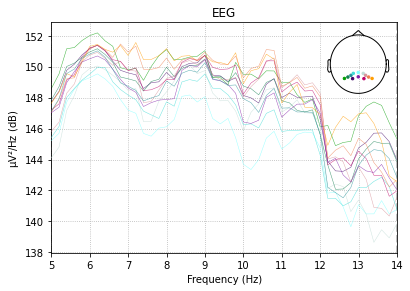


Evento 1
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


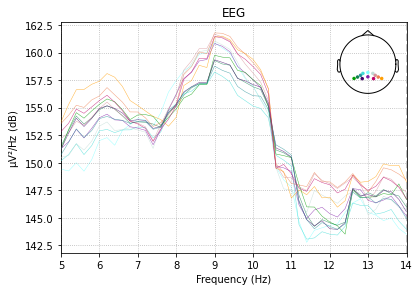


Evento 1
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


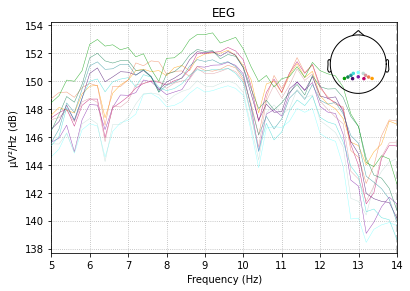


Evento 2
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


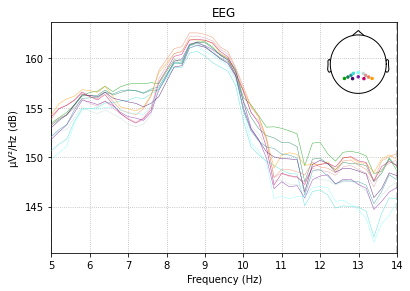


Evento 2
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


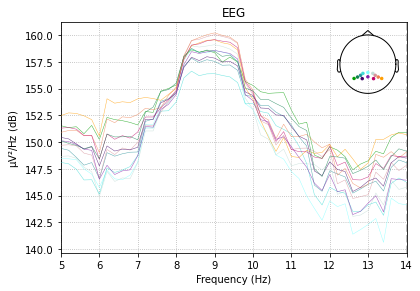


Evento 2
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


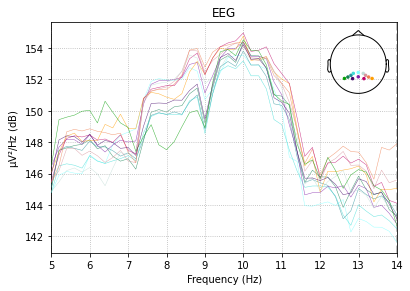


Evento 3
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


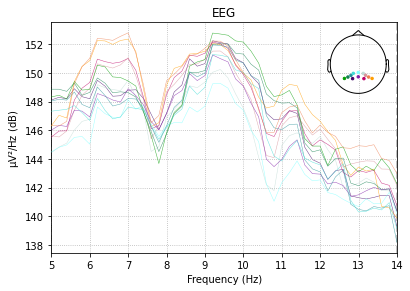


Evento 3
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


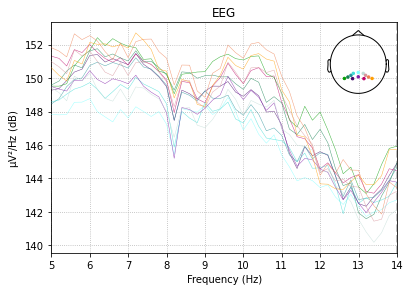


Evento 3
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


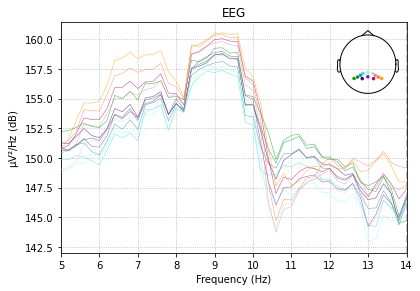


Evento 4
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


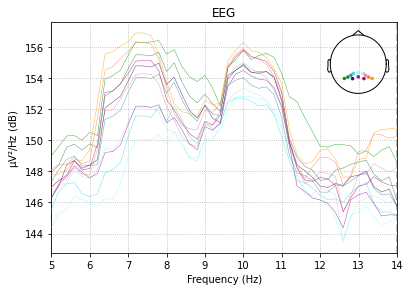


Evento 4
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


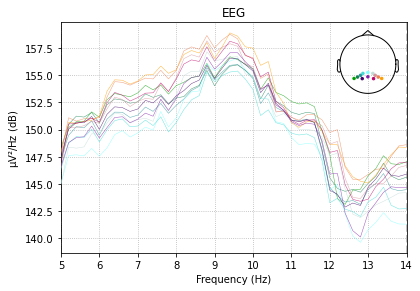


Evento 4
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


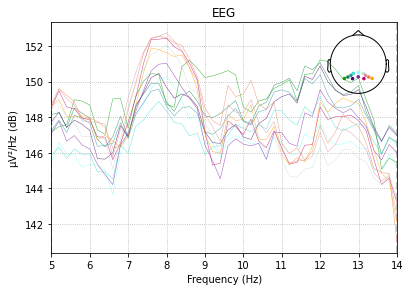


Evento 5
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


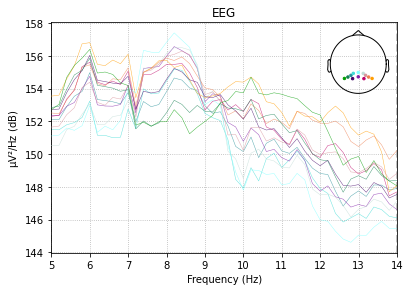


Evento 5
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


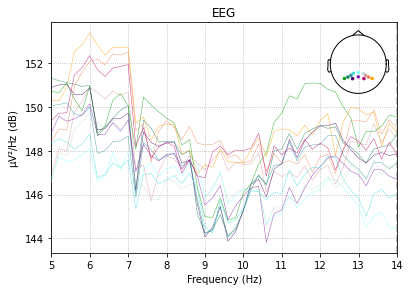


Evento 5
Rótulos {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}
    Using multitaper spectrum estimation with 7 DPSS windows


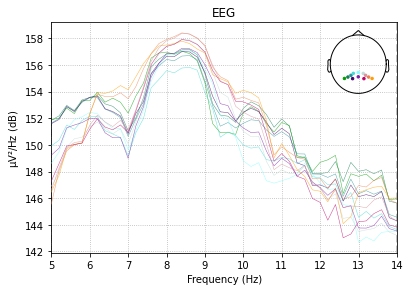

In [49]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]

for y in range(1,6):
    for i in (3, 9, 11):
        print("Evento " + str(y))
        print("Rótulos", descriptor['frequencies'])
        epoch_ex[str(y)][-i].plot_psd(fmin = 5., fmax = 14.)
        print()
        